In [1]:


## Importing required libraries and tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.utils import resample


In [2]:
# Oversampling the dataset

#file_path = 'ILPD.csv'
#df = pd.read_csv(file_path)
#n_samples = 1252 - len(df)
#df_oversampled = pd.concat([df, resample(df, replace=True, n_samples=n_samples, random_state=2)])
#df_oversampled = df_oversampled.sample(frac=1, random_state=42).reset_index(drop=True)
#output_path = 'ILPD_oversampled.csv'
#df_oversampled.to_csv(output_path, index=False)

In [3]:
#Read csv file into Dataframe
ilpd = pd.read_csv("ILPD.csv", encoding='utf-8')

In [4]:
#renaming the gender column
ilpd['Gender'] = ilpd['Gender'].replace({'Female':0,'Male':1})

In [5]:
# Shape of the dataset
ilpd.shape

(1252, 11)

In [6]:
# List of features i.e. columns
ilpd.columns.to_list()

['Age',
 'Gender',
 'Total Bilirubin',
 'Direct Bilirubin',
 'Alkaline Phosphotase',
 'Alamine Aminotransferase',
 'Aspartate Aminotransferase',
 'Total Proteins',
 'Albumin',
 'Albumin and Globulin Ratio',
 'Selection']

In [7]:
# Display of duplicate records within the transformed dataset

ilpd[ilpd.duplicated(keep=False)]


,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Proteins,Albumin,Albumin and Globulin Ratio,Selection
18,40,0,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,0,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,1,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,1,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,0,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,0,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,1,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,1,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,1,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,1,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [8]:
# Deleting the duplicate records

ilpd.drop_duplicates(inplace=True)

In [9]:
# Check for duplicate records after deleting them. This is to verify if any duplicate record is left 

ilpd[ilpd.duplicated()]

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Proteins,Albumin,Albumin and Globulin Ratio,Selection


In [10]:
# Check for null values. False is response for no missing value

ilpd.isna().any()

Age                           False
Gender                        False
Total Bilirubin               False
Direct Bilirubin              False
Alkaline Phosphotase          False
Alamine Aminotransferase      False
Aspartate Aminotransferase    False
Total Proteins                False
Albumin                       False
Albumin and Globulin Ratio    False
Selection                     False
dtype: bool

In [11]:
# Detail of dataset feature types

ilpd.dtypes

Age                             int64
Gender                          int64
Total Bilirubin               float64
Direct Bilirubin              float64
Alkaline Phosphotase            int64
Alamine Aminotransferase        int64
Aspartate Aminotransferase      int64
Total Proteins                float64
Albumin                       float64
Albumin and Globulin Ratio    float64
Selection                       int64
dtype: object

In [12]:
# Summary of the dataset including memory usage, index and non-null counts

ilpd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1233 entries, 0 to 1251
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1233 non-null   int64  
 1   Gender                      1233 non-null   int64  
 2   Total Bilirubin             1233 non-null   float64
 3   Direct Bilirubin            1233 non-null   float64
 4   Alkaline Phosphotase        1233 non-null   int64  
 5   Alamine Aminotransferase    1233 non-null   int64  
 6   Aspartate Aminotransferase  1233 non-null   int64  
 7   Total Proteins              1233 non-null   float64
 8   Albumin                     1233 non-null   float64
 9   Albumin and Globulin Ratio  1233 non-null   float64
 10  Selection                   1233 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 115.6 KB


In [13]:
# Statistical detail for each numerical column

ilpd.describe()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Proteins,Albumin,Albumin and Globulin Ratio,Selection
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,42.068127,0.603406,2.094482,0.876123,245.545823,53.264396,70.042985,6.524043,3.248183,0.982589,1.670722
std,16.124825,0.489389,4.437543,2.026084,186.475730,126.536389,202.132259,0.984080,0.722169,0.280143,0.470142
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,30.000000,0.000000,0.747158,0.200000,163.000000,21.000000,22.000000,5.900000,2.800000,0.800000,1.000000
50%,42.000000,1.000000,0.891449,0.228942,192.000000,29.000000,32.000000,6.600000,3.200000,1.000000,2.000000
75%,55.000000,1.000000,1.400000,0.571776,248.000000,45.000000,55.000000,7.200000,3.803711,1.127956,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Text(0.5, 1.0, 'Countplot of Gender')

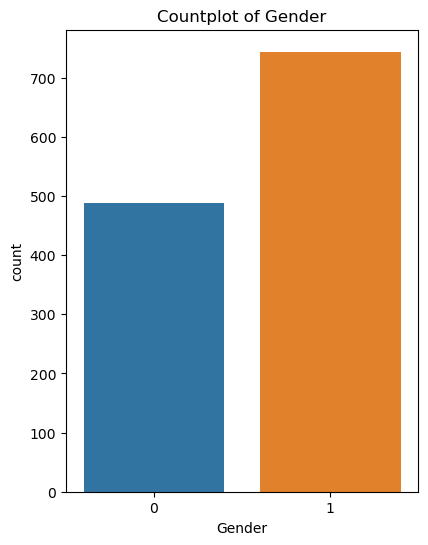

In [33]:
# Bar plot for Gender showing the representation of each within the dataset

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=ilpd, x="Gender")

plt.title("Countplot of Gender")

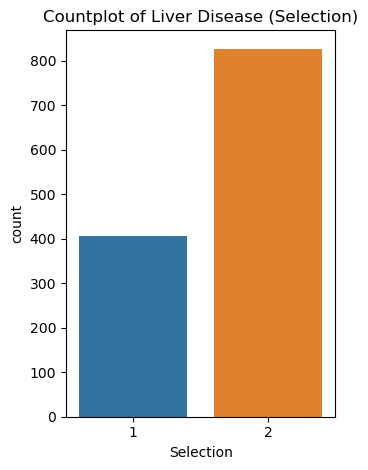

In [34]:
# Using bar plot to show count of those with liver disease

plt.subplot(1, 2, 2)
sns.countplot(data=ilpd, x="Selection")
plt.title("Countplot of Liver Disease (Selection)")
plt.tight_layout()

plt.show()

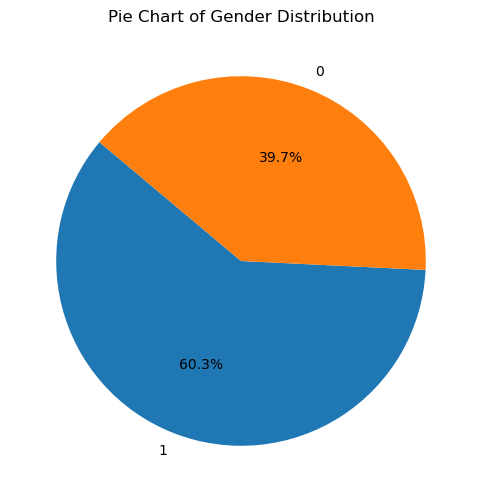

In [16]:
# Pie Chart showing gender

gender_counts = ilpd["Gender"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Pie Chart of Gender Distribution")
plt.show()

Text(0.5, 1.0, 'Histogram of Age')

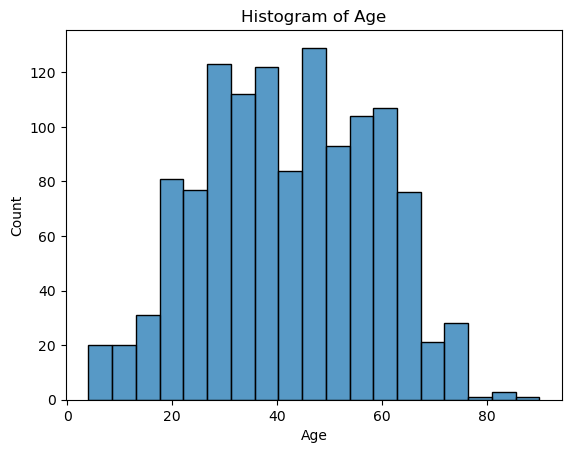

In [17]:
# Using histogram to present the frequency of ages represented within  the dataset

sns.histplot(data=ilpd,x='Age')
plt.title('Histogram of Age')

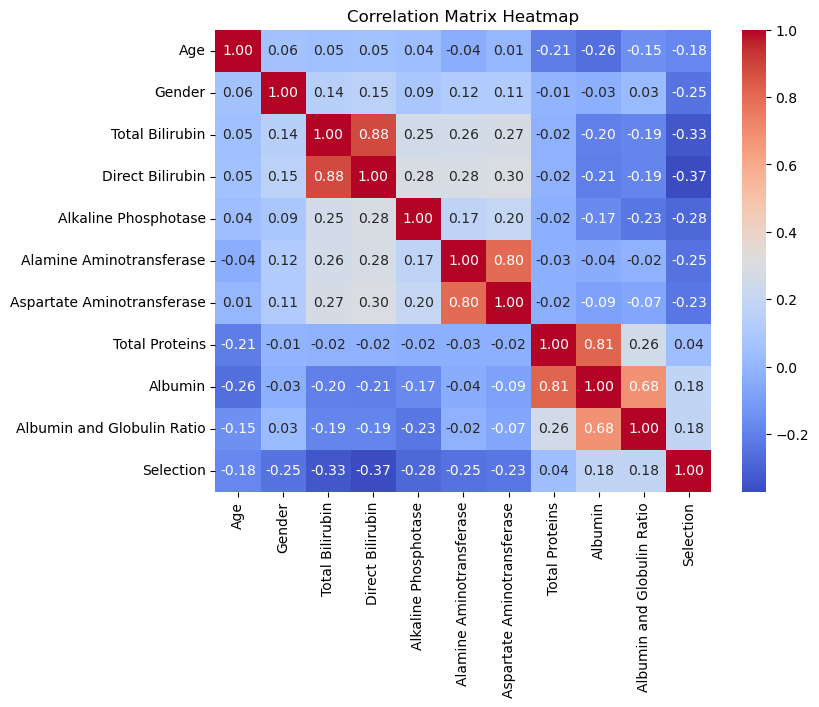

In [18]:
# Calculate the correlation matrix
correlation_matrix = ilpd.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

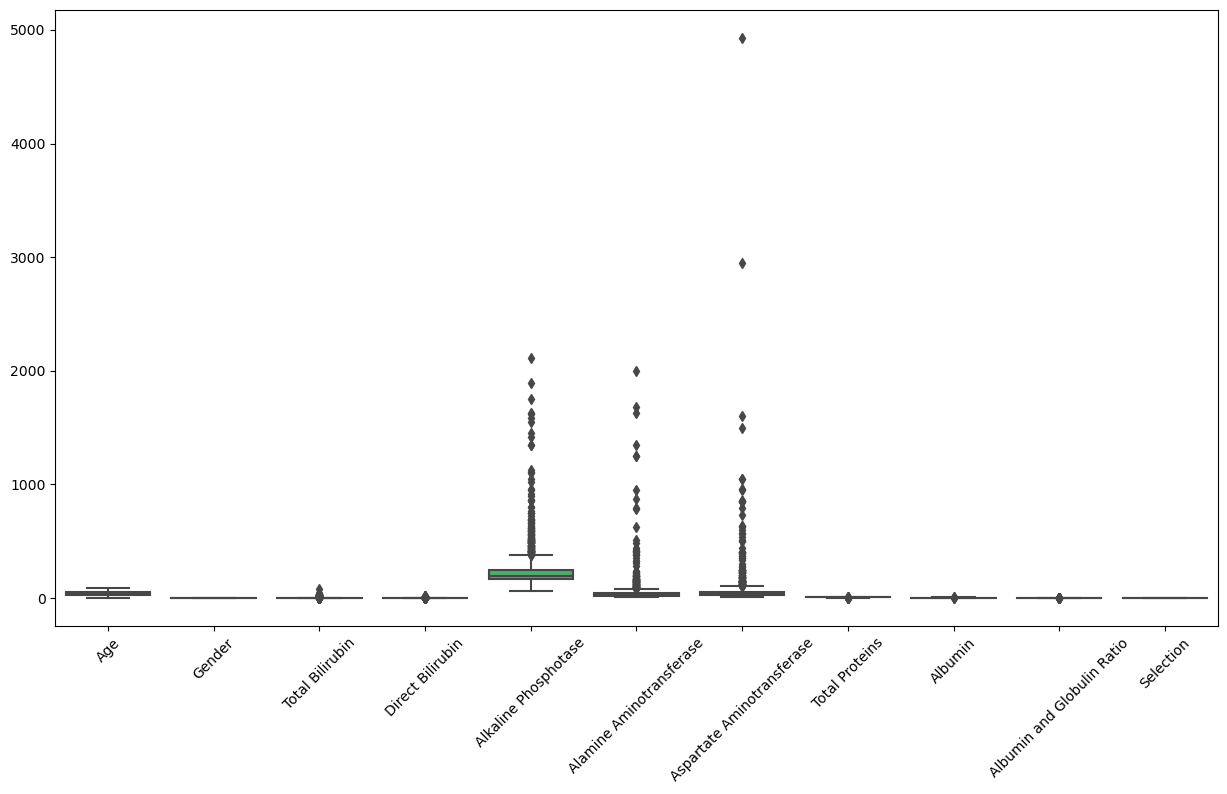

In [19]:
# Using box plots to visualise each feature to view outliers

plt.figure(figsize=(15, 8))
sns.boxplot(data=ilpd)
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.show()


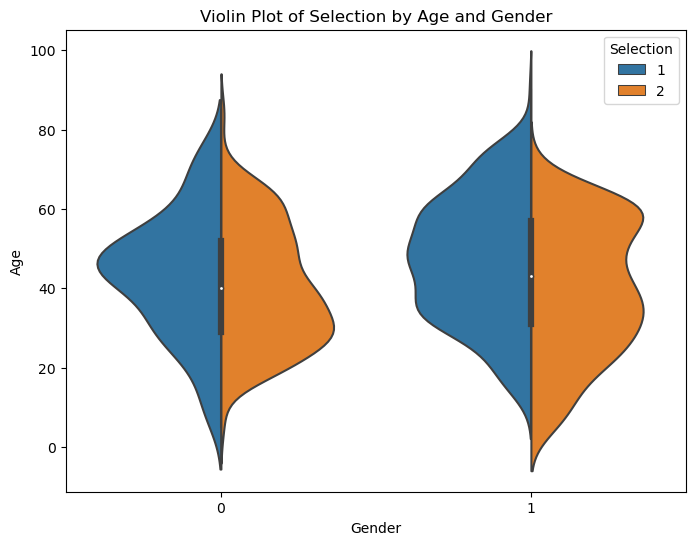

In [20]:
# Violin plot of diseased patients based on both Age and Gender
plt.figure(figsize=(8, 6))
sns.violinplot(data=ilpd, x="Gender", y="Age", hue="Selection", split=True)
plt.title("Violin Plot of Selection by Age and Gender" )
plt.show()

In [21]:
ilpd.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Proteins,Albumin,Albumin and Globulin Ratio,Selection
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [22]:
# Separate the target variable (Selector) from the features
X = ilpd.drop("Selection", axis=1)  # Features
y = ilpd["Selection"]  # Target

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features using the scaler
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [23]:
X_scaled_df

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Proteins,Albumin,Albumin and Globulin Ratio
0,1.422724,-1.233480,-0.314374,-0.383221,-0.314087,-0.294615,-0.257574,0.280535,0.071781,-0.294931
1,1.236600,0.810715,1.985128,2.283100,2.432693,0.084876,0.148265,0.992148,-0.066747,-0.866298
2,1.236600,0.810715,1.173539,1.591832,1.311449,0.053252,-0.010111,0.483853,0.071781,-0.330641
3,0.988435,0.810715,-0.246742,-0.235092,-0.340911,-0.310427,-0.247676,0.280535,0.210309,0.062174
4,1.857014,0.810715,0.407038,0.554929,-0.271168,-0.207648,-0.054655,0.788830,-1.174971,-2.080455
...,...,...,...,...,...,...,...,...,...,...
1228,-1.493219,-1.233480,-0.288446,-0.326432,-0.255074,-0.152306,-0.193234,0.036601,0.404291,0.640690
1229,-0.500557,0.810715,-0.200313,-0.207251,-0.630610,-0.199742,-0.213031,0.752331,1.536394,1.618807
1230,-0.066268,-1.233480,-0.275333,-0.338259,-0.432113,-0.223460,-0.203133,1.772412,1.409799,0.030245
1231,-1.679343,0.810715,-0.245007,-0.210675,0.383338,-0.286709,-0.173437,-0.023326,-0.722856,-0.977749


In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [25]:
# Create a logistic regression model
logreg_model = LogisticRegression()

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# f1 score
f1 = f1_score(y_test, y_pred)
print("f1_score:", f1)

# Precision score
precision = precision_score(y_test, y_pred)
print("precision:", precision)

# recall score
recall = recall_score(y_test, y_pred)
print("recall:", recall)


Accuracy: 0.7732793522267206
f1_score: 0.5625000000000001
precision: 0.8571428571428571
recall: 0.4186046511627907


C:\Users\info\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


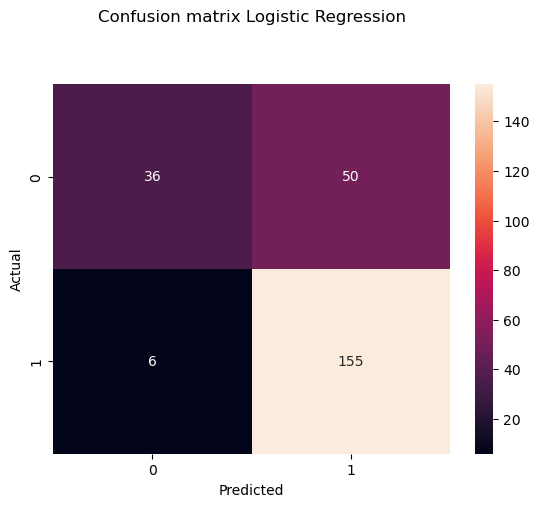

In [26]:

matrix_log = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix_log, annot=True,fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion matrix Logistic Regression\n', y=1.1)
plt.show()

In [27]:
class_report = classification_report(y_test, y_pred)

In [28]:
print(class_report)

              precision    recall  f1-score   support

           1       0.86      0.42      0.56        86
           2       0.76      0.96      0.85       161

    accuracy                           0.77       247
   macro avg       0.81      0.69      0.70       247
weighted avg       0.79      0.77      0.75       247



In [29]:
# decision tree
clf = DecisionTreeClassifier(criterion='entropy' or 'gini')
model_tree = clf .fit(X_train, y_train)

In [30]:
ypredTree = model_tree.predict(X_test)

In [31]:
print("Accuracy Score:",metrics.accuracy_score(y_test,ypredTree))
print("f1_Score:",metrics.f1_score(y_test,ypredTree))
print("precision Score:",metrics.precision_score(y_test,ypredTree))
print("Re Score:",metrics.recall_score(y_test,ypredTree))

Accuracy Score: 0.8097165991902834
f1_Score: 0.7116564417177915
precision Score: 0.7532467532467533
Re Score: 0.6744186046511628


Text(50.722222222222214, 0.5, 'Actual')

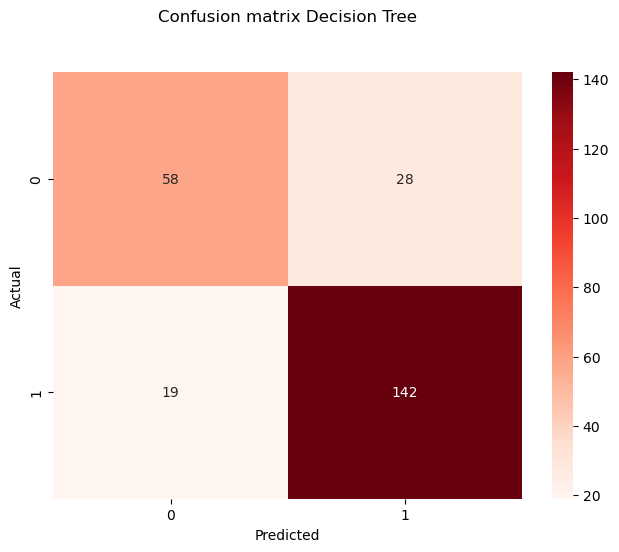

In [32]:
cnf_matrix_dc = confusion_matrix(y_test, ypredTree)

sns.heatmap(pd.DataFrame(cnf_matrix_dc), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix Decision Tree', y=1.1)
plt.xlabel("Predicted")
plt.ylabel("Actual")